# '맥주' 데이터 활용한 맥주 특성 분석

- 맥주, 양조장 데이터를 이용하여 맥주 특성 분석
- 출처 : https://www.kaggle.com/datasets/nickhould/craft-cans/data?select=beers.csv
- 사용 데이터 : 맥주, 양조장 데이터
- 데이터 수 : 2410 rows × 10 columns

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import scatter
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, chi2_contingency

## 1. 데이터셋 불러오기

In [17]:
beer_df = pd.read_csv('./beers.csv', index_col=0)
breweries_df = pd.read_csv('./breweries.csv', index_col=0)

In [18]:
beer_df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [19]:
breweries_df

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA
...,...,...,...
553,Covington Brewhouse,Covington,LA
554,Dave's Brewfarm,Wilson,WI
555,Ukiah Brewing Company,Ukiah,CA
556,Butternuts Beer and Ale,Garrattsville,NY


## 2. 데이터 프레임 병합

In [20]:
beer_df = pd.merge(beer_df, breweries_df, left_on='brewery_id', right_index=True, how='inner')
beer_df

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [21]:
# 컬럼명 변경
beer_df = beer_df.rename(columns={'name_x': 'beer_name', 'name_y' : 'brewery_name'})
beer_df

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [22]:
beer_df

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## 3. 데이터 확인

In [23]:
beer_df.columns

Index(['abv', 'ibu', 'id', 'beer_name', 'style', 'brewery_id', 'ounces',
       'brewery_name', 'city', 'state'],
      dtype='object')

- abv : 알콜 도수
- ibu : 쓴맛을 나타내는 지수, 값이 높을수록 음료의 쓴맛이 강함
- beer_name : 맥주 이름
- style : 맥주 종류 (lager, ale, IPA, etc.)
- ounces : 맥주 크기(온스 단위)
- brewery_name : 양조장 이름
- city : 양조장이 위치한 도시
- state : 양조장이 위치한 주

In [24]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abv           2348 non-null   float64
 1   ibu           1405 non-null   float64
 2   id            2410 non-null   int64  
 3   beer_name     2410 non-null   object 
 4   style         2405 non-null   object 
 5   brewery_id    2410 non-null   int64  
 6   ounces        2410 non-null   float64
 7   brewery_name  2410 non-null   object 
 8   city          2410 non-null   object 
 9   state         2410 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 207.1+ KB


In [25]:
# 결측값 확인
beer_df.isna().sum()

abv               62
ibu             1005
id                 0
beer_name          0
style              5
brewery_id         0
ounces             0
brewery_name       0
city               0
state              0
dtype: int64

- 맥주의 정확한 특성 분석을 위해 ibu와 abv는 중요한 데이터이므로 결측값 제외하고 진행

In [26]:
# ibu 컬럼의 결측값 제외한 데이터만 추출
beer_df = beer_df[beer_df['ibu'].notnull()].reset_index(drop = True)
beer_df

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
1,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,21st Amendment Brewery,San Francisco,CA
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,21st Amendment Brewery,San Francisco,CA
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,21st Amendment Brewery,San Francisco,CA
4,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,21st Amendment Brewery,San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...
1400,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
1401,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0,Worthy Brewing Company,Bend,OR
1402,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0,Worthy Brewing Company,Bend,OR
1403,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO


In [29]:
beer_df.isna().sum()

abv             0
ibu             0
id              0
beer_name       0
style           2
brewery_id      0
ounces          0
brewery_name    0
city            0
state           0
dtype: int64

In [28]:
# style 결측값 확인
beer_df[beer_df['style'].isnull()]

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
435,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0,Four Peaks Brewing Company,Tempe,AZ
444,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0,Freetail Brewing Company,San Antonio,TX


In [41]:
# style 결측값은 최빈값으로 대체

mode = beer_df['style'].mode()[0]
print(f"최빈값: {mode}")
print(f"최빈값 비율: {(beer_df['style'] == mode).sum() / len(beer_df) * 100:.2f}%")

beer_df['style'].fillna(mode, inplace=True)

최빈값: American IPA
최빈값 비율: 21.42%


In [42]:
beer_df

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
1,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,21st Amendment Brewery,San Francisco,CA
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,21st Amendment Brewery,San Francisco,CA
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,21st Amendment Brewery,San Francisco,CA
4,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,21st Amendment Brewery,San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...
1400,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
1401,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0,Worthy Brewing Company,Bend,OR
1402,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0,Worthy Brewing Company,Bend,OR
1403,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO


In [43]:
beer_df.isna().sum()

abv             0
ibu             0
id              0
beer_name       0
style           0
brewery_id      0
ounces          0
brewery_name    0
city            0
state           0
dtype: int64

## 4. EDA

In [47]:
beer_df

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
1,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,21st Amendment Brewery,San Francisco,CA
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,21st Amendment Brewery,San Francisco,CA
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,21st Amendment Brewery,San Francisco,CA
4,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,21st Amendment Brewery,San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...
1400,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
1401,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0,Worthy Brewing Company,Bend,OR
1402,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0,Worthy Brewing Company,Bend,OR
1403,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO


In [60]:
# 필요 없는 컬럼 삭제
beer_df.drop(['id', 'brewery_id'], axis = 1, inplace = True)

In [48]:
# 인기 있는 맥주 top 10
beer_df.groupby('beer_name')["beer_name"].count().sort_values(ascending=False).head(10)

beer_name
Nonstop Hef Hop           12
Dale's Pale Ale            6
Longboard Island Lager     4
Dagger Falls IPA           3
Boston Lager               3
1327 Pod's ESB             3
Plum St. Porter            2
Special Amber              2
Watermelon Ale             2
Pine Belt Pale Ale         2
Name: beer_name, dtype: int64

In [62]:
beer_df[beer_df['beer_name'] == 'Nonstop Hef Hop']

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
599,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
600,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
601,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
602,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
603,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
604,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
605,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
606,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
607,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR
608,0.039,20.0,Nonstop Hef Hop,American Pale Wheat Ale,16.0,Hopworks Urban Brewery,Portland,OR


- 가장 인기 있는 맥주 1위는 ```Nonstop Hef Hop```
- 미국 서부에 위치한 오리건 주에 있는 포틀랜드(Portland) Hopworks Urban Brewery에서 생산
- American Pale Wheat Ale의 스타일을 가지고 있으며 16온스 = 약 480ml, 알콜 도수는 0.039, 쓴 맛 지수는 20에 해당함

In [49]:
# 인기 있는 맥주 스타일 top 10
beer_df.groupby('style')["style"].count().sort_values(ascending=False).head(10)

style
American IPA                      303
American Pale Ale (APA)           153
American Amber / Red Ale           77
American Double / Imperial IPA     75
American Pale Wheat Ale            61
American Blonde Ale                61
American Porter                    39
American Brown Ale                 38
Fruit / Vegetable Beer             30
Hefeweizen                         27
Name: style, dtype: int64

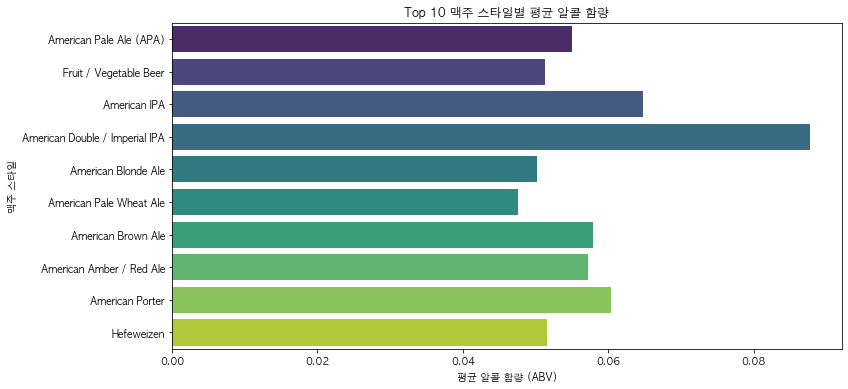

In [161]:
# 인기 있는 맥주 스타일 top 10
top_styles = beer_df['style'].value_counts().head(10).index

# top 10 스타일별 알콜 함량 평균 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='abv', y='style', data=beer_df[beer_df['style'].isin(top_styles)], ci=None, palette='viridis')
plt.title('Top 10 맥주 스타일별 평균 알콜 함량')
plt.xlabel('평균 알콜 함량 (ABV)')
plt.ylabel('맥주 스타일')
plt.show()

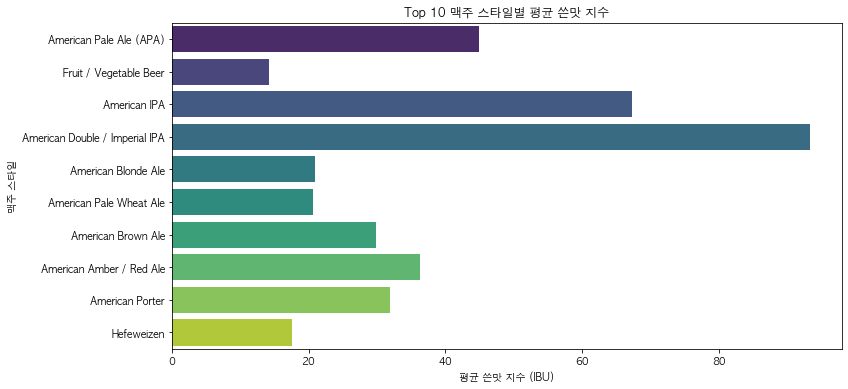

In [163]:
# top 10 스타일별 쓴맛 지수 평균 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='ibu', y='style', data=beer_df[beer_df['style'].isin(top_styles)], ci=None, palette='viridis')
plt.title('Top 10 맥주 스타일별 평균 쓴맛 지수')
plt.xlabel('평균 쓴맛 지수 (IBU)')
plt.ylabel('맥주 스타일')
plt.show()

- American Double / Imperial IPA 스타일이 알콜 함량 제일 높고 제일 씀

In [89]:
# 인기 있는 양조장 top 10
beer_df.groupby('brewery_name')["brewery_name"].count().sort_values(ascending=False).head(10)

brewery_name
Sun King Brewing Company      32
Oskar Blues Brewery           32
Sixpoint Craft Ales           23
Hopworks Urban Brewery        22
Great Crescent Brewery        20
Stevens Point Brewery         20
21st Amendment Brewery        17
Tallgrass Brewing Company     16
Cigar City Brewing Company    16
Great River Brewery           15
Name: brewery_name, dtype: int64

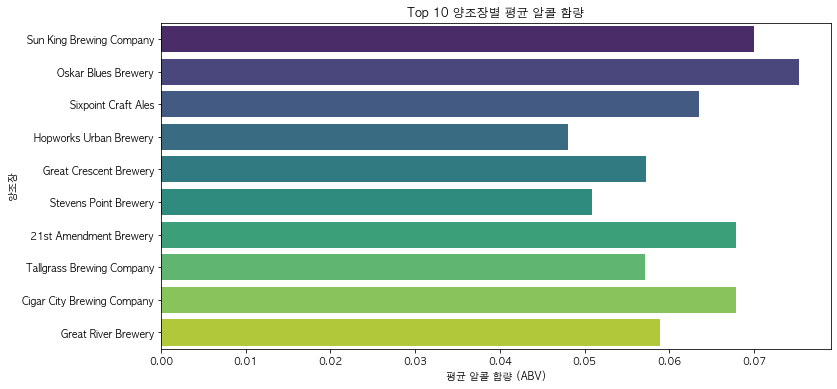

In [164]:
# 양조장별 평균 알콜 함량 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='abv', y='brewery_name', data=beer_df, ci=None, palette='viridis', order=beer_df['brewery_name'].value_counts().head(10).index)
plt.title('Top 10 양조장별 평균 알콜 함량')
plt.xlabel('평균 알콜 함량 (ABV)')
plt.ylabel('양조장')
plt.show()

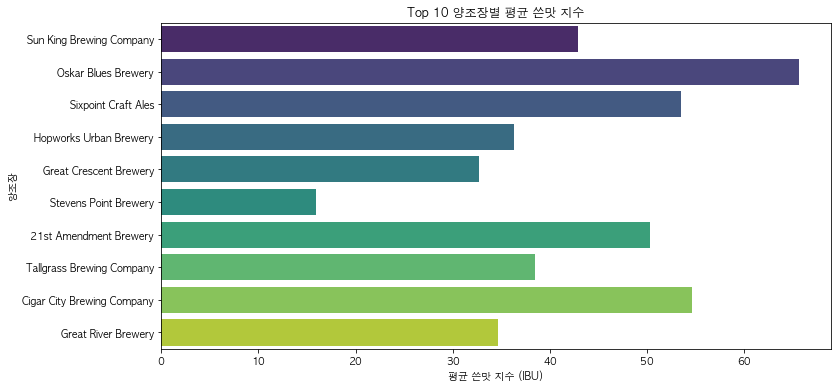

In [167]:
# 양조장별 평균 쓴맛 지수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='ibu', y='brewery_name', data=beer_df, ci=None, palette='viridis', order=beer_df['brewery_name'].value_counts().head(10).index)
plt.title('Top 10 양조장별 평균 쓴맛 지수')
plt.xlabel('평균 쓴맛 지수 (IBU)')
plt.ylabel('양조장')
plt.show()

- Oskar Blues Brewery 양조장이 알콜 함량 제일 높고 제일 쓴 맥주 많이 만드는 것 확인

In [51]:
# 인기 있는 도시 top 10
beer_df.groupby('city')["city"].count().sort_values(ascending=False).head(10)

city
Portland         41
Indianapolis     36
San Diego        35
Brooklyn         28
Boulder          26
Seattle          24
Aurora           24
San Francisco    22
Longmont         20
Tampa            20
Name: city, dtype: int64

In [52]:
# 인기 있는 주 top 10
beer_df.groupby('state')["state"].count().sort_values(ascending=False).head(10)

state
 CO    146
 CA    135
 IN     91
 TX     89
 OR     87
 MA     51
 PA     47
 MN     46
 NY     46
 WA     43
Name: state, dtype: int64

In [153]:
# 맥주 용량(온스 기준) 순위
beer_df['ounces'].value_counts()

ounces
12.0    906
16.0    479
19.2      8
24.0      7
32.0      3
8.4       1
16.9      1
Name: count, dtype: int64

In [170]:
# 제일 큰 용량의 맥주를 만드는 양조장 : CA에 있는 San Diego의 Mission Brewery 양조장
beer_df[beer_df['ounces'] == beer_df['ounces'].max()]

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
774,0.068,66.0,Mission IPA,American IPA,32.0,Mission Brewery,San Diego,CA
775,0.048,44.0,El Conquistador Extra Pale Ale,American Pale Ale (APA),32.0,Mission Brewery,San Diego,CA
776,0.092,75.0,Shipwrecked Double IPA,American Double / Imperial IPA,32.0,Mission Brewery,San Diego,CA


In [171]:
# 제일 적은 용량의 맥주를 만드는 양조장 : CA에 있는 San Diego의 21st Amendment Brewery 양조장
beer_df[beer_df['ounces'] == beer_df['ounces'].min()]

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
1,0.099,92.0,Lower De Boom,American Barleywine,8.4,21st Amendment Brewery,San Francisco,CA


In [106]:
# 대중적인 알콜 함량 top 10
beer_df['abv'].value_counts().head(10)

abv
0.050    116
0.055     76
0.065     70
0.052     66
0.060     61
0.070     61
0.056     49
0.058     44
0.048     44
0.053     43
Name: count, dtype: int64

In [173]:
# 제일 알콜 함량 높은 맥주는?
beer_df[beer_df['abv'] == beer_df['abv'].max()]

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
39,0.125,80.0,London Balling,English Barleywine,16.0,Against the Grain Brewery,Louisville,KY


In [172]:
# 제일 알콜 함량 적은 맥주는?
beer_df[beer_df['abv'] == beer_df['abv'].min()]

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
598,0.027,21.0,Totally Radler,Radler,16.0,Hopworks Urban Brewery,Portland,OR


In [105]:
# 대중적인 쓴맛 정도 top 10
beer_df['ibu'].value_counts().head(10)

ibu
20.0    82
35.0    60
65.0    54
30.0    53
70.0    48
18.0    46
25.0    45
60.0    44
40.0    41
15.0    40
Name: count, dtype: int64

In [174]:
# 제일 쓴맛 지수 높은 맥주는?
beer_df[beer_df['ibu'] == beer_df['ibu'].max()]

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
88,0.082,138.0,Bitter Bitch Imperial IPA,American Double / Imperial IPA,12.0,Astoria Brewing Company,Astoria,OR


In [175]:
# 제일 쓴맛 지수 낮은 맥주는?
beer_df[beer_df['ibu'] == beer_df['ibu'].min()]

,abv,ibu,beer_name,style,ounces,brewery_name,city,state
60,0.056,4.0,Summer Solstice,Cream Ale,12.0,Anderson Valley Brewing Company,Boonville,CA
66,0.056,4.0,Summer Solstice Cerveza Crema (2009),Cream Ale,12.0,Anderson Valley Brewing Company,Boonville,CA
71,0.056,4.0,Summer Solstice (2011),Cream Ale,12.0,Anderson Valley Brewing Company,Boonville,CA


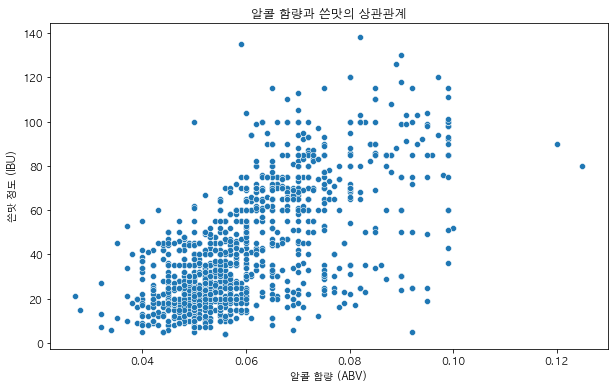

In [176]:
# 알콜 함량과 쓴맛의 상관관계 확인

plt.figure(figsize=(10, 6))
sns.scatterplot(x='abv', y='ibu', data = beer_df[['abv', 'ibu']])
plt.title('알콜 함량과 쓴맛의 상관관계')
plt.xlabel('알콜 함량 (ABV)')
plt.ylabel('쓴맛 정도 (IBU)')
plt.show()

In [84]:
# 알콜과 쓴맛 정도의 상관관계
beer_df[['abv', 'ibu']].corr()

,abv,ibu
abv,1.000000,0.670621
ibu,0.670621,1.000000


- 0.67, 양의 선형 상관 관계가 있다.
- 알콜 함량이 증가할수록 쓴맛 정도도 증가하는 경향이 있다.

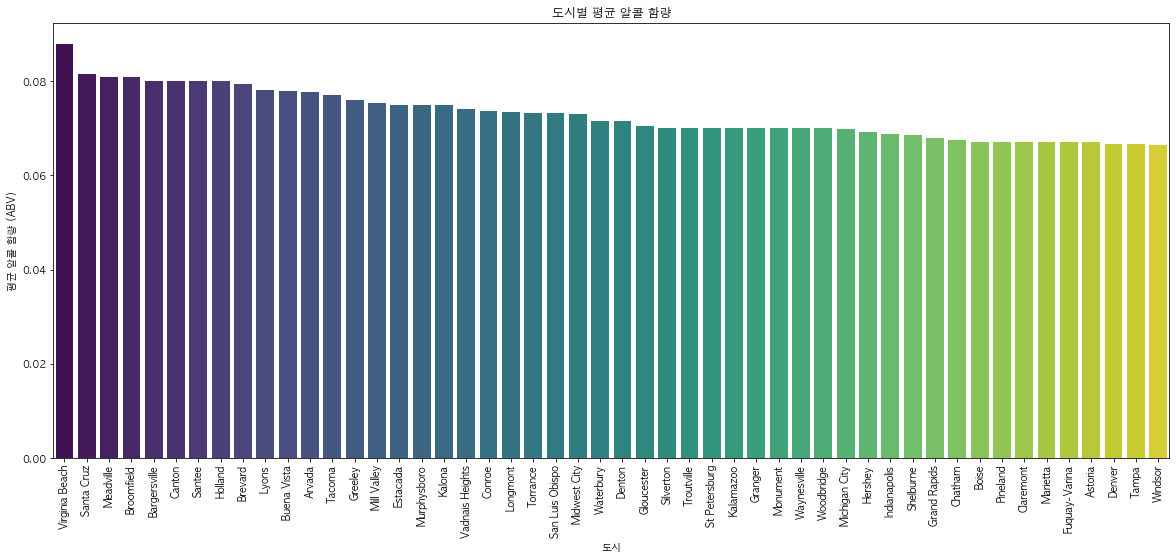

In [114]:
# 평균적으로 어떤 도시가 알콜이 높은 맥주를 소비할까?
# 각 도시에서의 평균 알콜 함량 계산
avg_abv_by_city = beer_df.groupby('city')['abv'].mean().sort_values(ascending=False).head(50)

# 시각화
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_abv_by_city.index, y=avg_abv_by_city.values, palette='viridis')
plt.title('도시별 평균 알콜 함량')
plt.xlabel('도시')
plt.ylabel('평균 알콜 함량 (ABV)')
plt.xticks(rotation=90)
plt.show()

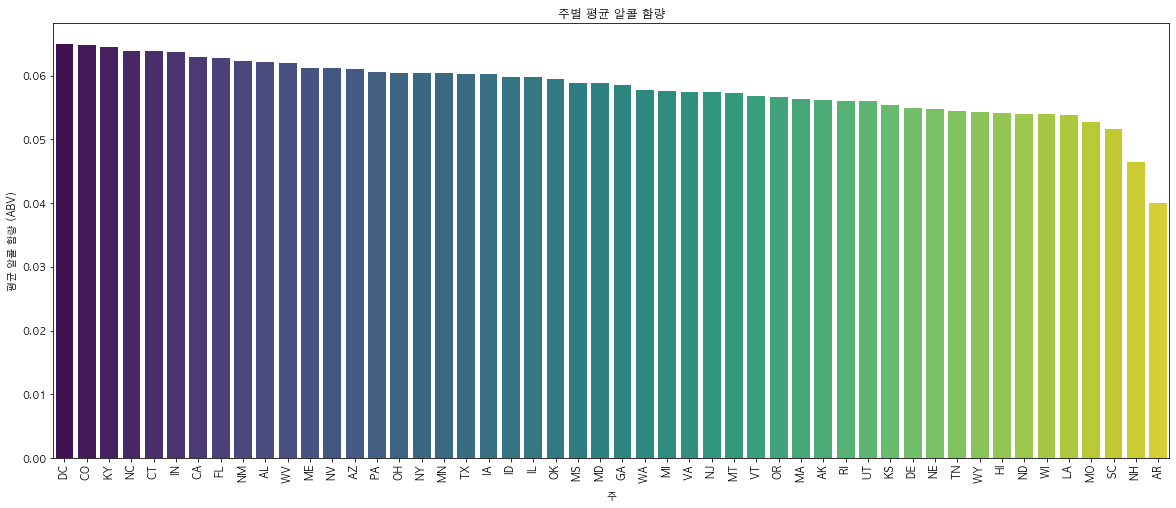

In [125]:
# 평균적으로 어떤 주가 알콜이 높은 맥주를 소비할까?
# 각 주에서의 평균 알콜 함량 계산
avg_abv_by_state = beer_df.groupby('state')['abv'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_abv_by_state.index, y=avg_abv_by_state.values, palette='viridis')
plt.title('주별 평균 알콜 함량')
plt.xlabel('주')
plt.ylabel('평균 알콜 함량 (ABV)')
plt.xticks(rotation=90)
plt.show()

-  top 3: DC(워싱턴 D.C.), CO(콜로라도), KY(켄터키), 최하위 주 : AR(알칸소)

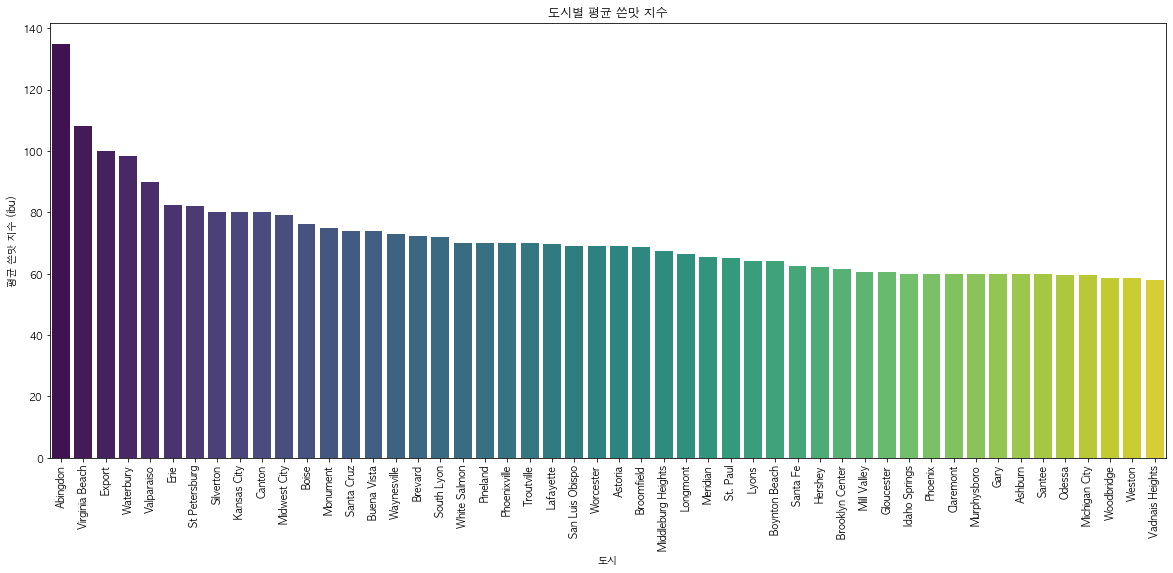

In [145]:
# 평균적으로 어떤 도시가 쓴맛이 높은 맥주를 소비할까?
# 각 도시에서의 평균 쓴맛 지수 계산
avg_ibu_by_city = beer_df.groupby('city')['ibu'].mean().sort_values(ascending=False).head(50)

# 시각화
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_ibu_by_city.index, y=avg_ibu_by_city.values, palette='viridis')
plt.title('도시별 평균 쓴맛 지수')
plt.xlabel('도시')
plt.ylabel('평균 쓴맛 지수 (ibu)')
plt.xticks(rotation=90)
plt.show()

- 다른 도시들에 비해 Abingdon도시는 쓴 맥주를 즐겨 마시는 편

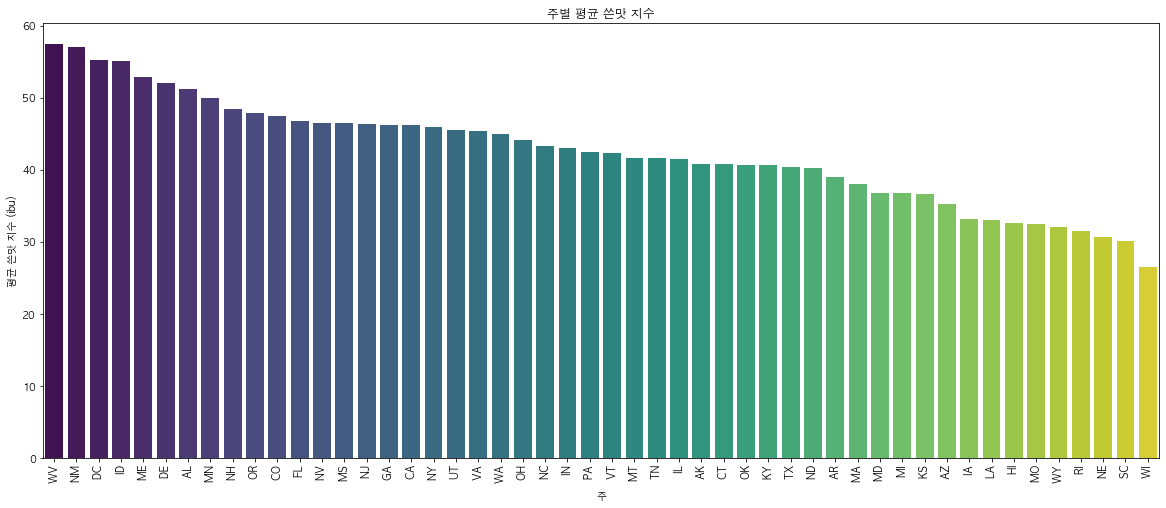

In [149]:
# 평균적으로 어떤 주가 쓴맛이 높은 맥주를 소비할까?
# 각 주에서의 평균 쓴맛 지수 계산
avg_ibu_by_state = beer_df.groupby('state')['ibu'].mean().sort_values(ascending=False).head(50)

# 시각화
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_ibu_by_state.index, y=avg_ibu_by_state.values, palette='viridis')
plt.title('주별 평균 쓴맛 지수')
plt.xlabel('주')
plt.ylabel('평균 쓴맛 지수 (ibu)')
plt.xticks(rotation=90)
plt.show()

- Top 3 : MV, NM, DC, 최하위는 WI

In [150]:
# 알콜함량과 온스의 상관관계
beer_df[['abv', 'ounces']].corr().iloc[0, 1]

0.10598081468343135

In [151]:
# 쓴맛지수와 온스의 상관관계
beer_df[['ibu', 'ounces']].corr().iloc[0, 1]

0.05469082729677247